# ESG Performance Analysis in the S&P 500
#### Data Wrangling Final Project By Aashna Dorwal

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pearsonr, ttest_ind

In [19]:
df = pd.read_csv("final_merged_sp500.csv")
df

,Company Name,Ticker Symbol,Sector,Total ESG Score,Environmental Score,Social Score,Governance Score,Highest Controversy,Overall Risk,Full-time Employees,Market Cap,Revenue Growth,YTD Return
0,Agilent Technologies,A,Health Care,13.64,1.12,6.42,6.10,2.0,8,17400.0,38415384576,-0.056,-15.10%
1,Apple Inc.,AAPL,Information Technology,17.22,0.46,7.39,9.37,3.0,1,164000.0,3846819807232,0.061,-10.87%
2,AbbVie,ABBV,Health Care,29.93,2.38,17.19,10.36,3.0,6,50000.0,310274424832,0.038,16.08%
3,Abbott Laboratories,ABT,Health Care,24.83,2.27,14.24,8.33,3.0,7,114000.0,198127370240,0.049,16.43%
4,Arch Capital Group,ACGL,Financials,22.46,1.47,10.10,10.89,2.0,5,6400.0,34234257408,0.418,4.10%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,ExxonMobil,XOM,Energy,41.60,23.11,10.01,8.48,3.0,7,62000.0,465308188672,-0.015,10.66%
404,Xylem Inc.,XYL,Industrials,18.13,4.27,8.66,5.19,1.0,3,23000.0,28458575872,0.013,3.33%
405,Yum! Brands,YUM,Consumer Discretionary,20.10,4.53,11.45,4.12,2.0,2,35000.0,36937969664,0.069,18.46%
406,Zimmer Biomet,ZBH,Health Care,26.02,3.60,14.52,7.89,2.0,2,18000.0,21324808192,0.040,6.38%


In [20]:
df.dtypes

Company Name            object
Ticker Symbol           object
Sector                  object
Total ESG Score        float64
Environmental Score    float64
Social Score           float64
Governance Score       float64
Highest Controversy    float64
Overall Risk             int64
Full-time Employees    float64
Market Cap               int64
Revenue Growth         float64
YTD Return              object
dtype: object

In [21]:
df[['Total ESG Score', 'Environmental Score', 'Social Score', 'Governance Score', 'Highest Controversy']].describe()

,Total ESG Score,Environmental Score,Social Score,Governance Score,Highest Controversy
count,408.000000,408.000000,408.000000,408.000000,408.000000
mean,21.498897,5.726495,9.076985,6.695662,1.887255
std,6.877077,5.060685,3.672882,2.164744,0.915085
min,7.080000,0.000000,0.760000,2.960000,0.000000
25%,16.355000,1.757500,6.667500,5.250000,1.000000
50%,21.010000,4.080000,8.900000,6.090000,2.000000
75%,25.745000,8.872500,11.197500,7.657500,2.000000
max,41.660000,24.980000,22.480000,19.430000,5.000000


____

# 1. Do ESG scores significantly vary across different sectors?

Environmental, Social, and Governance (ESG) scores are metrics used to assess a company's sustainability and ethical practices. These scores are typically provided on a scale where **higher scores indicate better performance**.

- **Environmental Score**: How well a company manages its environmental impact.
- **Social Score**: The company's treatment of employees, customers, and communities.
- **Governance Score**: The structure and quality of corporate oversight, ethics, and transparency.

The chart below shows the average ESG score by sector to highlight which industries tend to be more sustainable and ethically responsible.

/var/folders/w8/qvh774051cl2bg7_xmprn1_w0000gn/T/ipykernel_6853/1436136266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=sector_risk.index, x=sector_risk.values, palette=colors)


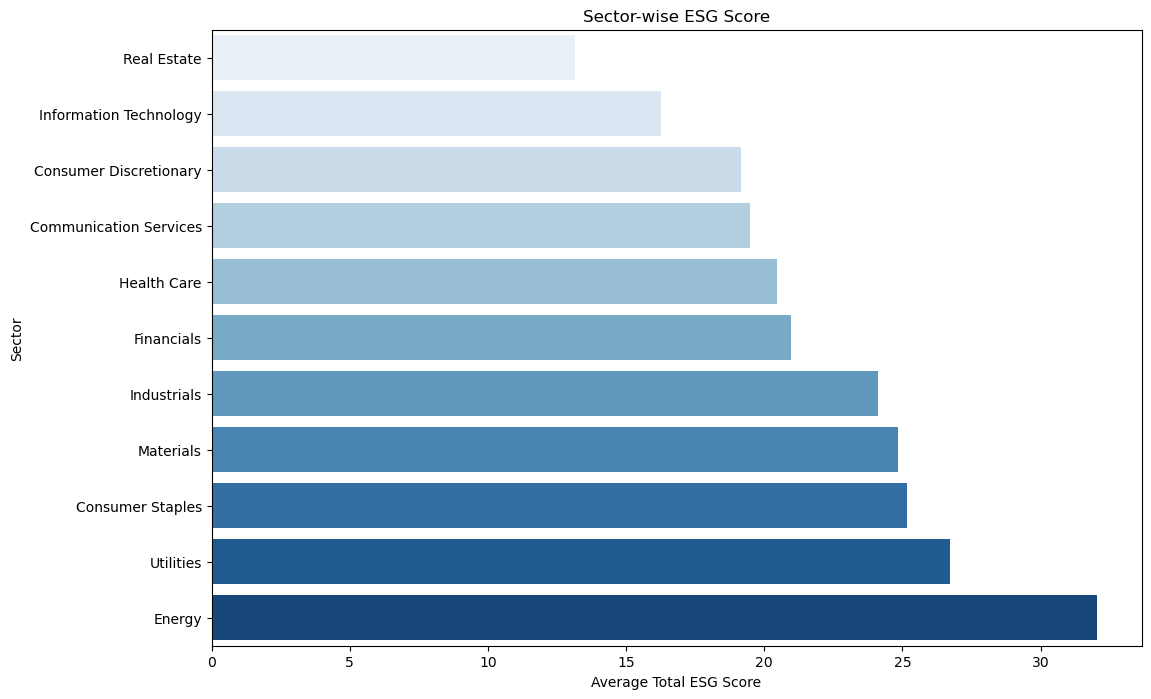

In [22]:
sector_risk = df.groupby('Sector')['Total ESG Score'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("Blues", n_colors=len(sector_risk))
ax = sns.barplot(y=sector_risk.index, x=sector_risk.values, palette=colors)
plt.title('Sector-wise ESG Score')
plt.ylabel('Sector')
plt.xlabel('Average Total ESG Score')

plt.show()

### Findings:
- Real Estate, Information Technology, and Consumer Discretionary have the **lowest** average ESG scores, indicating **weaker** ESG performance compared to other sectors.

- Energy, Utilities, and Consumer Staples have the **highest** average ESG scores, suggesting **stronger** ESG performance.

## Companies with the highest/lowest Total ESG Score

/var/folders/w8/qvh774051cl2bg7_xmprn1_w0000gn/T/ipykernel_6853/1260801001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Total ESG Score', y='Company Name', data=top_performers, palette='Greens_r')
/var/folders/w8/qvh774051cl2bg7_xmprn1_w0000gn/T/ipykernel_6853/1260801001.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Total ESG Score', y='Company Name', data=bottom_performers, palette='Reds_r')


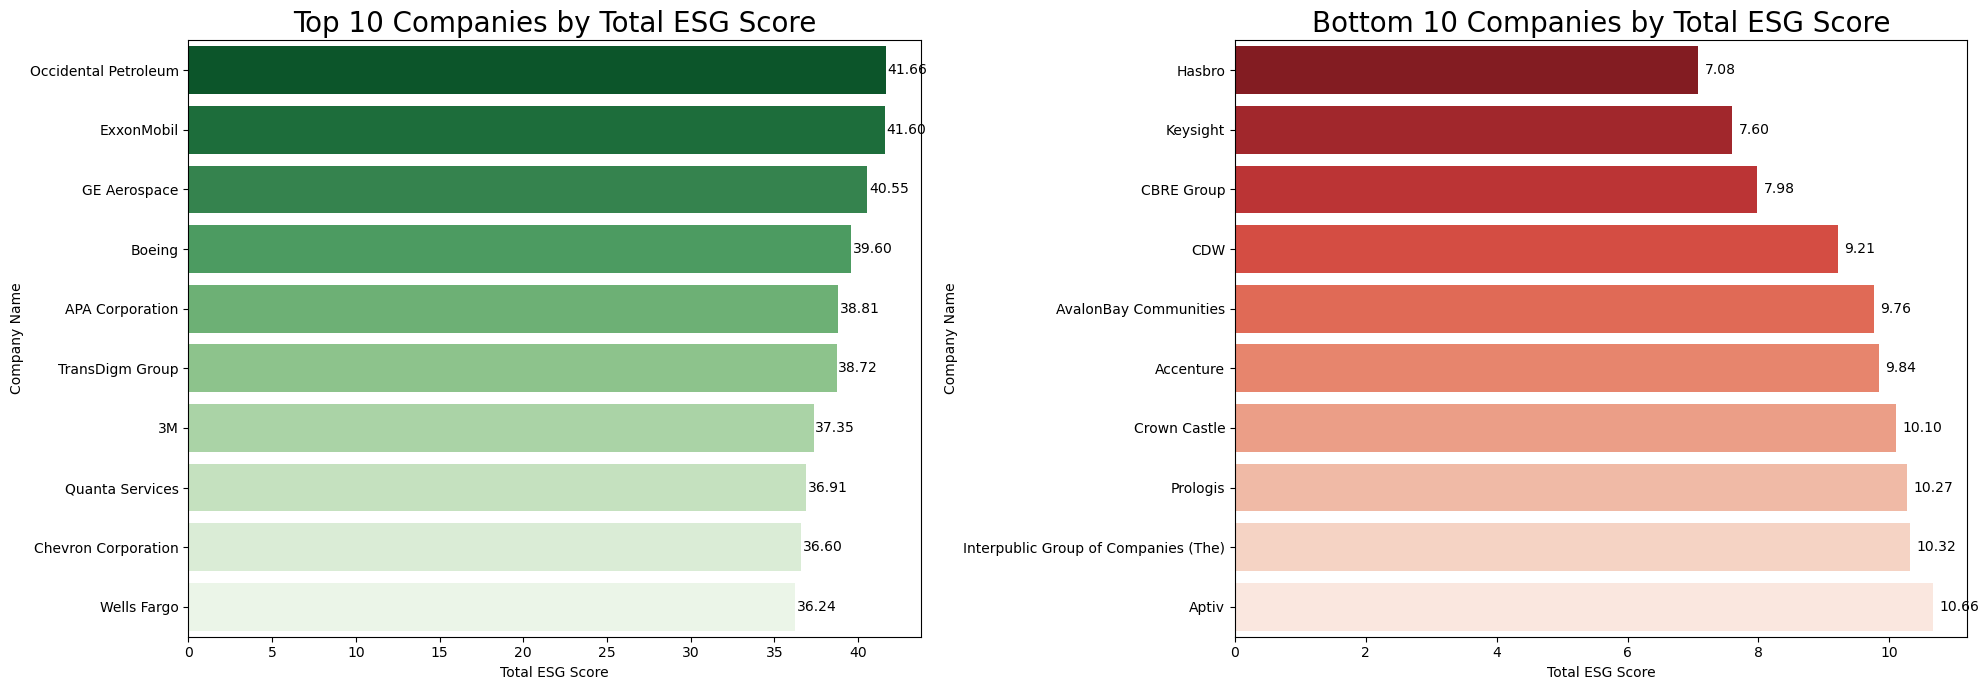

In [23]:
top_performers = df.sort_values(by='Total ESG Score', ascending=False).head(10)
bottom_performers = df.sort_values(by='Total ESG Score', ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharex=False)

# Top 10 companies
sns.barplot(ax=axes[0], x='Total ESG Score', y='Company Name', data=top_performers, palette='Greens_r')
axes[0].set_title('Top 10 Companies by Total ESG Score', size=20)
axes[0].set_xlabel('Total ESG Score')
axes[0].set_ylabel('Company Name')
for i, v in enumerate(top_performers['Total ESG Score']):
    axes[0].text(v + 0.1, i, f"{v:.2f}", color='black', va='center')

# Bottom 10 companies
sns.barplot(ax=axes[1], x='Total ESG Score', y='Company Name', data=bottom_performers, palette='Reds_r')
axes[1].set_title('Bottom 10 Companies by Total ESG Score', size=20)
axes[1].set_xlabel('Total ESG Score')
axes[1].set_ylabel('Company Name')
for i, v in enumerate(bottom_performers['Total ESG Score']):
    axes[1].text(v + 0.1, i, f"{v:.2f}", color='black', va='center')

plt.tight_layout()
plt.show()

## Comparing Sectors: Consumer Discretionary & Consumer Staples
- Consumer Staples include essential products such as food, beverages, and household goods.
- Consumer Discretionary includes non-essential goods and services such as entertainment, apparel, and luxury items.

I hypothesize that ESG (Environmental, Social, and Governance) scores will differ between these two sectors due to the different operational structures.

In [24]:
disc_scores = df[df['Sector'] == 'Consumer Discretionary']['Total ESG Score']
staple_scores = df[df['Sector'] == 'Consumer Staples']['Total ESG Score']

t_stat, p_val = ttest_ind(disc_scores, staple_scores, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -4.64
P-value: 0.0000


### Findings:
- The p-value is significantly below the common threshold of 0.05, so I reject the null hypothesis.
- This indicates a statistically significant difference in ESG scores between the two sectors.

## ANOVA:

In [25]:
from scipy.stats import f_oneway
sectors = df['Sector'].unique()
sector_groups = [df[df['Sector'] == sector]['Total ESG Score'] for sector in sectors]

f_statistic, p_value = f_oneway(*sector_groups)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in ESG scores across sectors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ESG scores across sectors.")

F-statistic: 25.9662
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in ESG scores across sectors.


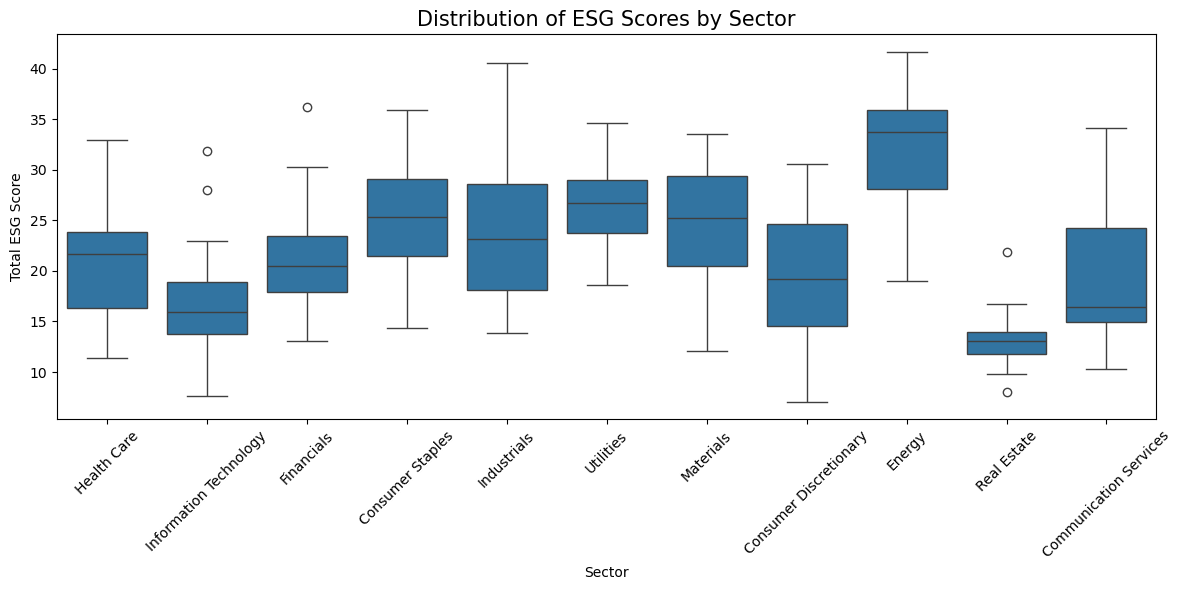

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='Total ESG Score', data=df)
plt.title('Distribution of ESG Scores by Sector', size=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Findings:
- The F-statistic of 25.9662 and p-value of 0.0000 suggest that there is a significant difference in the average ESG scores across different sectors.

- The sector in which a company operates does indeed impact its ESG score.


_____

# 2.	Which ESG feature has the highest impact on Revenue Growth?

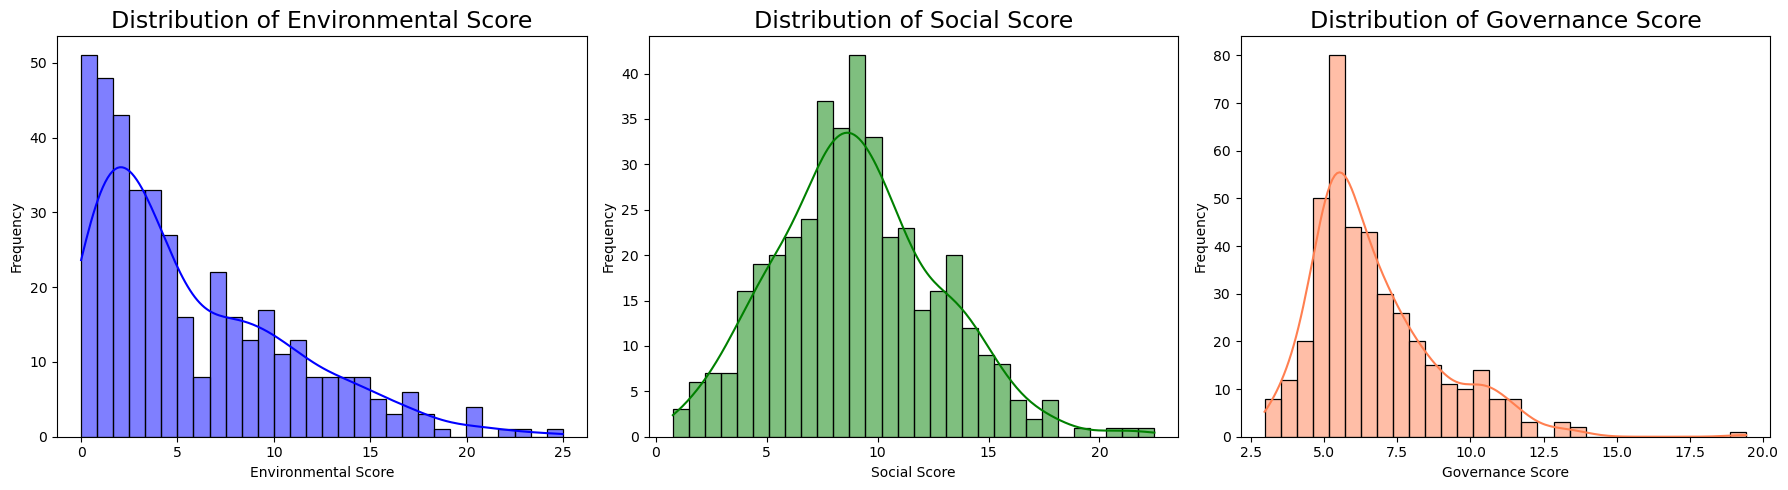

In [27]:
# Distribution of ESG Scores
plt.figure(figsize=(18, 5))

# Environmental Score
plt.subplot(1, 3, 1)
sns.histplot(df['Environmental Score'], kde=True, color='blue', bins=30)
plt.title('Distribution of Environmental Score', size=17)
plt.xlabel('Environmental Score')
plt.ylabel('Frequency')

# Social Score
plt.subplot(1, 3, 2)
sns.histplot(df['Social Score'], kde=True, color='green', bins=30)
plt.title('Distribution of Social Score', size=17)
plt.xlabel('Social Score')
plt.ylabel('Frequency')

# Governance Score
plt.subplot(1, 3, 3)
sns.histplot(df['Governance Score'], kde=True, color='coral', bins=30)
plt.title('Distribution of Governance Score', size=17)
plt.xlabel('Governance Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### To answer this question, I used two different approaches: Regression and Classification.

-  Regression: I used a Random Forest Regressor to predict Revenue Growth as a continuous value. By checking the importance of each feature, I could see which ESG factors had the biggest influence on the actual revenue growth values.

- Classification: I transformed Revenue Growth into a binary variable (high vs. low) by comparing it to the median. Then, I applied a Random Forest Classifier to identify which ESG features helped distinguish between high and low growth companies.

## Regression Model:

In [28]:
X = df[['Environmental Score', 'Social Score', 'Governance Score', 'Highest Controversy', 'Overall Risk', 'Full-time Employees']]

# Target Variable
y = df['Revenue Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")

Mean Squared Error: 0.02
Root Mean Squared Error: 0.16


### Findings:
- The low MSE and RMSE indicate that the model’s predictions are quite close to the actual revenue growth values.

- The model performed well with a low Root Mean Squared Error of 0.16, indicating good predictive accuracy.

In [29]:
# Feature importance
importance = model.feature_importances_

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
2,Governance Score,0.273452
0,Environmental Score,0.260467
5,Full-time Employees,0.172077
1,Social Score,0.166592
4,Overall Risk,0.071789
3,Highest Controversy,0.055624


### Findings:
- Governance Score had the strongest influence on Revenue Growth, contributing 27.3% to the model’s predictive power.

- Since higher ESG scores are better, this suggests that strong governance practices and environmental responsibility are positively associated with higher revenue growth among S&P 500 companies.

## Classification Model:

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

df['Growth_Category'] = (df['Revenue Growth'] > df['Revenue Growth'].median()).astype(int)

X = df[['Environmental Score', 'Social Score', 'Governance Score',
        'Highest Controversy', 'Overall Risk', 'Full-time Employees']]
y = df['Growth_Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Classification
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"AUC: {auc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.51
AUC: 0.56
F1 Score: 0.49


### Findings:
- These results show that the model performs only slightly better than random guessing, indicating that ESG features alone do not strongly separate high-growth from low-growth companies.

- This suggests that ESG may have some influence, but it’s likely better understood as a complex and continuous effect, and not easily captured in a simple high/low classification.

## Hypothesis Testing: Governance Score vs Revenue Growth

I wanted to check if there’s a meaningful connection between how well a company performs in governance and how much its revenue grows. To do this, I used Pearson correlation to test the relationship between the Governance Score and Revenue Growth.

In [31]:
governance_score = df['Governance Score']
revenue_growth = df['Revenue Growth']

corr, p_value = pearsonr(governance_score, revenue_growth)
print(f"Correlation: {corr:.4f}, p-value: {p_value:.4f}")

# Hypothesis testing
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between Governance Score and Revenue Growth.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Governance Score and Revenue Growth.")

Correlation: 0.0923, p-value: 0.0626
Fail to reject the null hypothesis: There is no significant relationship between Governance Score and Revenue Growth.


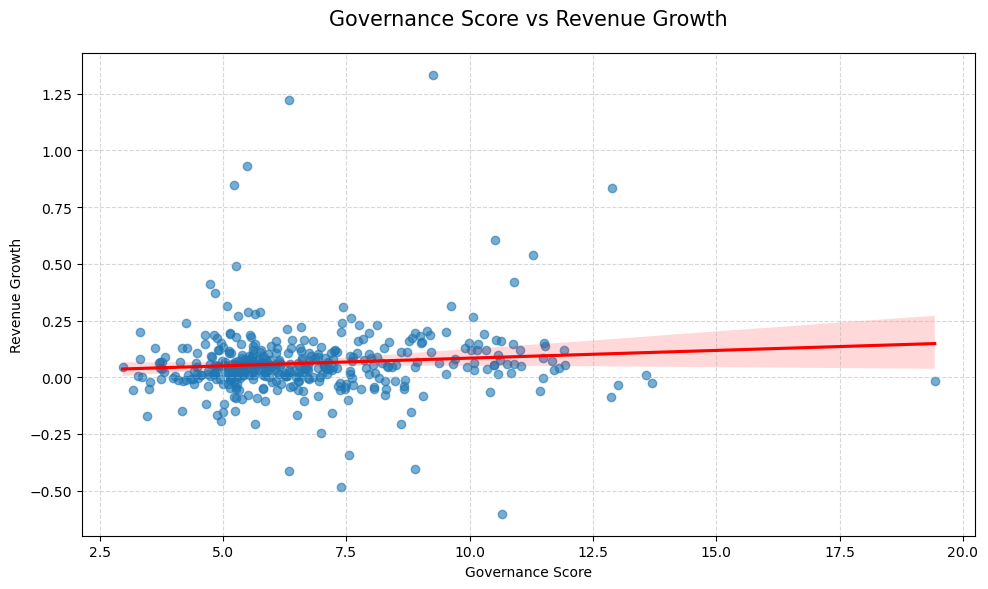

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Governance Score', y='Revenue Growth', data=df, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.title('Governance Score vs Revenue Growth', pad=20, size=15)
plt.xlabel('Governance Score')
plt.ylabel('Revenue Growth')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Findings:
- The correlation coefficient between Governance Score and Revenue Growth is 0.0923, which indicates a weak positive relationship. As governance scores increase, revenue growth shows a slight upward trend.

- The p-value (0.0626) is above the common significance threshold of 0.05, we fail to reject the null hypothesis. 

- This suggests that Governance Score may not have a strong direct impact on short-term revenue growth. More analysis is needed, possibly with a larger dataset and longer time horizon.

_____

# 3. Is there a correlation between year-to-date (YTD) returns and Total ESG scores?


In [33]:
df['YTD Return'] = df['YTD Return'].replace('%', '', regex=True).astype(float) / 100

corr, p_value = pearsonr(df['YTD Return'], df['Total ESG Score'])

print(f"Correlation: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between YTD Return and Total ESG Score.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between YTD Return and Total ESG Score.")

Correlation: 0.1257
P-value: 0.0110
Reject the null hypothesis: There is a significant relationship between YTD Return and Total ESG Score.


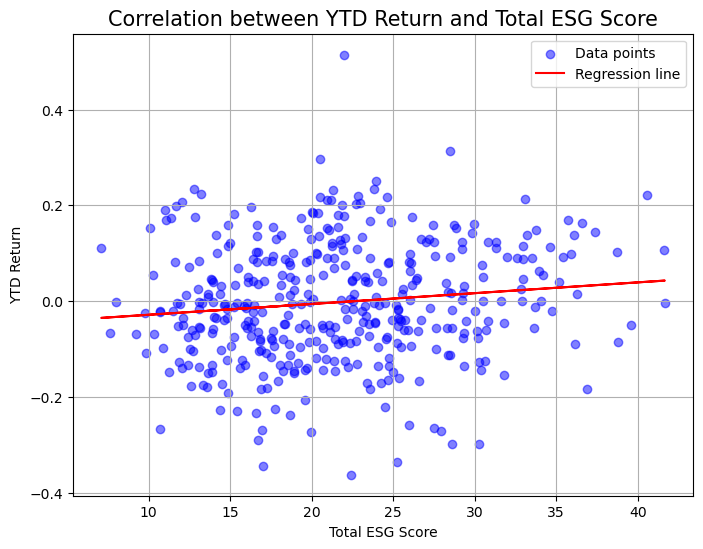

In [34]:
X = df[['Total ESG Score']]
y = df['YTD Return']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['Total ESG Score'], df['YTD Return'], color='blue', alpha=0.5, label='Data points')
plt.plot(df['Total ESG Score'], y_pred, color='red', label='Regression line')

plt.title('Correlation between YTD Return and Total ESG Score', size=15)
plt.xlabel('Total ESG Score')
plt.ylabel('YTD Return')
plt.legend()
plt.grid(True)
plt.show()

### Findings:
- P-value (0.0110) is below the standard significance level (0.05), which means the correlation is statistically significant.

- The correlation coefficient between YTD returns and Total ESG scores is 0.1257. This indicates a weak positive relationship. As Total ESG scores increase, there is a slight increase in YTD returns.

____

## Conclusion

Some limitations include the use of data from a single point in time, which means the analysis doesn’t capture how ESG performance and financial results change over the long term. ESG scores were also taken from one rating source, which might differ from others, and additional business factors like company size, market conditions, or leadership decisions weren’t considered. These could all influence financial outcomes and may add more context in future analysis.

Overall, this project provided a useful look at how ESG factors relate to business outcomes. While the results weren’t always strong, they hint at connections worth exploring further. With more data and deeper analysis, ESG’s role in financial performance could become clearer.
